# STA 220 Data & Web Technologies for Data Analysis

### Lecture 20, 3/14/24, Natural language processing


### Announcements 

- Extra OH tomorrow, 3/15, 10-11 AM via Zoom.

### Final Project Report
- Structure: Title, abstract, main body (motivation, explaining challenges, preliminary interpretation of the data)
- Formal, consise, professional (-> use spell check, but do not let ChatGPT write your report!)
- Data visualization (if any) and code should be provided seperately

### Today's topics
- Named Entity Recognition
- Relation Extraction
- Analyzing Sentence Structure

### Named Entity Recognition
Named entities are definite noun phrases that refer to specific types of individuals, such as organizations,
persons, dates, and so on.

| NAMED ENTITY | EXAMPLE | 
| ---- | ---- |
| ORGANIZATION | Georgia-Pacific Corp., WHO |
| PERSON | Eddy Bonte, President Obama |
| LOCATION | Murray River, Mount Everest |
| DATE | June, 2008-06-29 |
| TIME | two fifty a m, 1:30 p.m. |
| FACILITY | Washington Monument, Stonehenge |
| GEO-POLITICAL ENTITIES | South East Asia, Midlothian |

The goal of a named entity recognition (NER) system is to identify textual mentions
of the named entities. This can be broken down into two subtasks: identifying
the boundaries of the NE, and identifying its type. 

How do we go about identifying named entities? One option would be to look up each
word in an appropriate list of names. However, this is prone to errors caused by the fact that many named entity terms
are ambiguous.

Named entity recognition is a task that is well suited to the type of classifier-based
approach that we saw for noun phrase chunking. In particular, we can build a tagger
that labels each word in a sentence using the IOB format, where chunks are labeled by
their appropriate type.

NLTK provides a classifier that has already been trained to recognize named entities,
accessed with the function `nltk.ne_chunk()`. If we set the parameter `binary=True`,
then named entities are just tagged as `NE`; otherwise, the classifier adds category labels
such as `PERSON`, `ORGANIZATION`, and `GPE`.

In [5]:
import requests
import lxml.html as lx

In [6]:
r=requests.get('https://plato.stanford.edu/entries/liberalism-latin-america/')
html=lx.fromstring(r.text)
d=" ".join(html.xpath('//div[@id="aueditable"]//p//text()'))

In [7]:
d[:100]

'\nLiberal political discourse was dominant in Latin America during most\nof the nineteenth century. In'

In [8]:
import nltk
import re
def preprocess(document):
    document = re.sub("\s+", " ", document)
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences

In [9]:
document=preprocess(d)

In [10]:
document[0]

[('Liberal', 'JJ'),
 ('political', 'JJ'),
 ('discourse', 'NN'),
 ('was', 'VBD'),
 ('dominant', 'JJ'),
 ('in', 'IN'),
 ('Latin', 'NNP'),
 ('America', 'NNP'),
 ('during', 'IN'),
 ('most', 'JJS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('nineteenth', 'JJ'),
 ('century', 'NN'),
 ('.', '.')]

In [11]:
t=[nltk.ne_chunk(sentence) for sentence in document]

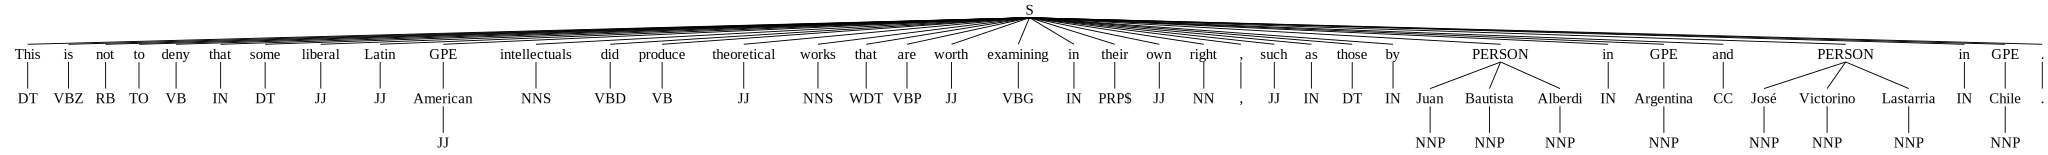

In [12]:
t[15]

In [13]:
for sent in t:
    for chunk in sent:
        if hasattr(chunk, "label"):
            print(chunk)

(GPE Latin/NNP America/NNP)
(GPE Hispanic/NNP America/NNP)
(GPE Liberal/JJ)
(GPE Colombia/NNP)
(PERSON Latin/JJ American/JJ)
(ORGANIZATION American/JJ)
(GPE American/JJ)
(GPE Portuguese/NNP)
(GPE Brazil/NNP)
(GPE Spain/NNP)
(GPE Portugal/NNP)
(GPE American/JJ)
(GPE Brazil/NNP)
(GPE Spanish/JJ)
(GPE Liberal/JJ)
(GPE Liberal/JJ)
(GPE American/JJ)
(PERSON Juan/NNP Bautista/NNP Alberdi/NNP)
(GPE Argentina/NNP)
(PERSON José/NNP Victorino/NNP Lastarria/NNP)
(GPE Chile/NNP)
(GPE American/JJ)
(GPE Chief/NNP)
(GPE Central/JJ)
(ORGANIZATION Catholic/NNP)
(ORGANIZATION Catholic/NNP Church/NNP)
(GPE American/JJ)
(PERSON Juan/NNP Bautista/NNP Alberdi/NNP)
(GPE Argentina/NNP)
(PERSON José/NNP María/NNP Luis/NNP Mora/NNP)
(GPE Mexico/NNP)
(PERSON José/NNP Victorino/NNP Lastarria/NNP)
(GPE Chile/NNP)
(PERSON Alberdi/NNP)
(GSP Lastarria/NNP)
(GPE Second/JJ)
(GPE American/JJ)
(GPE American/JJ)
(ORGANIZATION Catholic/NNP Church/NNP)
(PERSON Latin/JJ)
(GPE American/JJ)
(PERSON Latin/JJ)
(GPE American/JJ)


### Relation Extraction

Once named entities have been identified in a text, we then want to extract the relations
that exist between them. We will typically be looking for relations
between specified types of named entity. One way of approaching this task is to initially
look for all triples of the form `(X, α, Y)`, where `X` and `Y` are named entities of the required
types, and `α` is the string of words that intervenes between `X` and `Y`.

In [14]:
from nltk.tree import ParentedTree
newtree = ParentedTree.convert(t[0])

In [15]:
for sent in t:
    for i, chunk in enumerate(sent):
        try: 
            if (hasattr(sent[i], "label") and sent[i].label()=="PERSON" 
                and sent[i+1][1]=='IN' and hasattr(sent[i], "label") and sent[i].label()=="PERSON"): 
                relation = {
                    " ".join([i[0] for i in sent[i].leaves()]): 
                    " ".join([i[0] for i in sent[i+2].leaves()])
                }
                print(relation)
        except: 
            pass 

{'Juan Bautista Alberdi': 'Argentina'}
{'José Victorino Lastarria': 'Chile'}
{'Juan Bautista Alberdi': 'Argentina'}
{'José María Luis Mora': 'Mexico'}
{'José Victorino Lastarria': 'Chile'}
{'Lucas Alamán': 'Mexico'}
{'Simón Bolívar': 'Venezuela'}
{'José María Luis Mora': 'Mexico'}
{'Lucas Alamán': 'Mexico'}
{'Miguel Antonio Caro': 'Colombia'}
{'Gabriel García Moreno': 'Ecuador'}
{'Miguel Antonio Caro': 'New Granada'}
{'Victorino Lastarria': 'Chile'}
{'Justo Sierra': 'Mexico'}
{'Lessons': 'Positivist Politics'}


### Analyzing Sentence Structure

Now, we will adopt the formal framework of “generative grammar,” in which
a “language” is considered to be nothing more than an enormous collection of all
grammatical sentences, and a grammar is a formal notation that can be used for “generating”
the members of this set. Grammars use recursive productions of the form
“S” → “S and S”. 

> While hunting in Africa, I shot an elephant in my pajamas. How an elephant
got into my pajamas I’ll never know.

In [16]:
groucho = re.split(" ", "I shot an elephant in my pajamas")
patterns = [(r'(elephant|pajamas|I)', 'N'), 
            (r'(shot)', 'V'),
            (r'(in)', 'P'),
            (r'(an|my)', 'D')]
regexp_tagger = nltk.RegexpTagger(patterns)
s = regexp_tagger.tag(groucho)
s

[('I', 'N'),
 ('shot', 'V'),
 ('an', 'D'),
 ('elephant', 'N'),
 ('in', 'P'),
 ('my', 'D'),
 ('pajamas', 'N')]

In [17]:
groucho

['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']

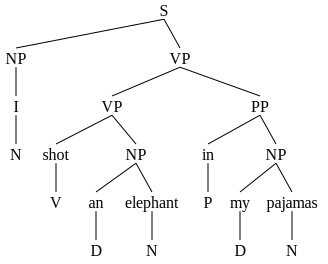

In [18]:
grammar = r"""
    NP: {<D><N><PP>|<N>|<D><N>} 
    PP: {<P><NP>} 
    VP: {<V><NP>|<VP><PP>} 
"""
cp=nltk.RegexpParser(grammar, loop=2)
cp.parse(s)

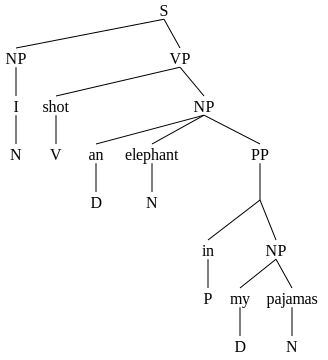

In [19]:
from nltk.tree import Tree
Tree.fromstring("(S (NP (I N)) (VP (shot V) (NP (an D) (elephant N) (PP ((in P)(NP (my D)(pajamas N)))))))")

Notice that there’s no ambiguity concerning the meaning of any of the words; e.g., the
word `shot` doesn’t refer to the act of using a gun in the first sentence and using a camera
in the second sentence. The ambiguity in meaning is solely induced by the grammar. 

In this context, we distinguish between chunking and (grammar) parsing. A grammar might licence different parsed trees, and during parsing we verify whether the given sentence adheres to the grammar. 

Consider the sentence: 
> The worst part and clumsy looking for whoever heard light

You intuitively know that these sequences are “word-salad,” but you probably find it
hard to pin down what’s wrong with them. One benefit of studying grammar is that it
provides a conceptual framework and vocabulary for spelling out these intuitions. 

The phrase 
> The worst part and clumsy looking

is a coordinate structure, where two phrases are joined by a coordinating conjunction
such as and, but, or or. One can conjoin two `NP`s, or adjective phrases (`AP`), but not `NP` “The worst part” and `AP` “clumsy looking”, as that would be ungrammatical. 

We can formalize this idea with the concept of __constituent structure__. Constituent structure is based on the observation that words combine with other words
to form units.
The evidence that a sequence of words forms such a unit is given by
substitutability—that is, a sequence of words in a well-formed sentence can be replaced
by a shorter sequence without rendering the sentence ill-formed.

In [20]:
sentence = nltk.word_tokenize('The little bear saw the fine fat trout in the brook')

In [21]:
s=[(w, t) for w,t in zip(sentence, [
    'DT', 'JJ', 'NN', 'VBD', 'DT', 'JJ', 'JJ', 'NN', 'IN', 'DT', 'NN'
])]

In [22]:
nltk.pos_tag(sentence)

[('The', 'DT'),
 ('little', 'JJ'),
 ('bear', 'NN'),
 ('saw', 'VBD'),
 ('the', 'DT'),
 ('fine', 'JJ'),
 ('fat', 'NN'),
 ('trout', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('brook', 'NN')]

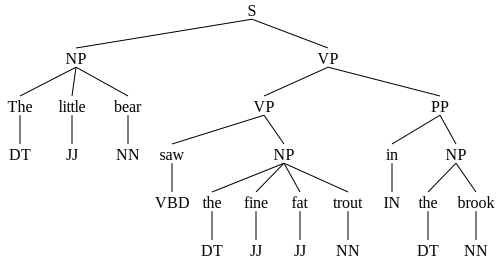

In [23]:
grammar = r"""
    NP: {<DT>?<JJ>*<NN.*>+} 
    PP: {<IN><NP>} 
    VP: {<V.*><PP|NP>} 
"""
cp=nltk.RegexpParser(grammar, loop=3)
cp.parse(s)

We can replace each `NP` with a noun, `VP` with a verb, etc., and the sentence still makes sense. 

In [24]:
from nltk import CFG
grammar = CFG.fromstring("""
    S -> NP VP
    VP -> V NP | V NP PP
    PP -> P NP
    V -> "saw" | "ate" | "walked" | "shot"
    NP -> "John" | "Mary" | "Bob" | DT N | DT N PP | "I"
    DT -> "a" | "an" | "the" | "my"
    N -> "man" | "dog" | "cat" | "telescope" | "park" | "elephant" | "pajamas"
    P -> "in" | "on" | "by" | "with"
""")

In [25]:
parser = nltk.RecursiveDescentParser(grammar)
treelist=[tree for tree in parser.parse(nltk.word_tokenize('Mary saw Bob'))]

In [32]:
nltk.app.rdparser()

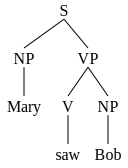

In [27]:
treelist[0]

In [28]:
parser = nltk.RecursiveDescentParser(grammar)
treelist=[tree for tree in parser.parse(groucho)]

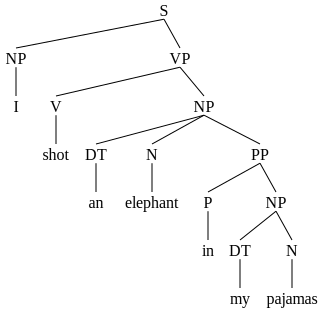

In [29]:
treelist[0]

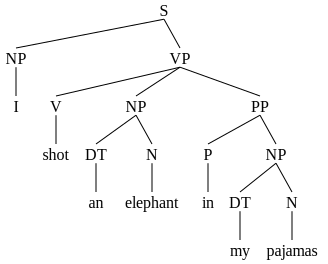

In [30]:
treelist[1]

Since our grammar licenses two trees for this sentence, the sentence is said to be structurally
ambiguous. 

Beware that the RecursiveDescentParser is unable to handle leftrecursive
productions of the form `X -> X Y`

##### Dependency Grammar

![ ](https://www.nltk.org/images/depgraph0.png)

In [36]:
groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
... 'shot' -> 'I' | 'elephant' | 'in'
... 'elephant' -> 'an' | 'in'
... 'in' -> 'pajamas'
... 'pajamas' -> 'my'
... """)
print(groucho_dep_grammar)

Dependency grammar with 7 productions
  'shot' -> 'I'
  'shot' -> 'elephant'
  'shot' -> 'in'
  'elephant' -> 'an'
  'elephant' -> 'in'
  'in' -> 'pajamas'
  'pajamas' -> 'my'


In [55]:
pdp = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
sentence = nltk.word_tokenize('I shot an elephant in my pajamas')
trees = list(pdp.parse(sent))

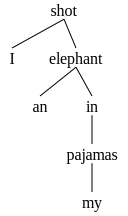

In [56]:
trees[0]

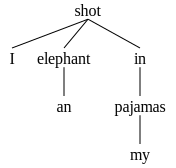

In [57]:
trees[1]

##### Summary
- Sentences have internal organization that can be represented using a tree.
- A grammar is a compact characterization of a potentially infinite set of sentences; we say that a tree is well-formed according to a grammar, or that a grammar licenses a tree.
- A grammar is a formal model for describing whether a given phrase can be assigned a particular constituent or dependency structure.
- Given a set of syntactic categories, a context-free grammar uses a set of productions to say how a phrase of some category A can be analyzed into a sequence of smaller parts. 
- A dependency grammar uses productions to specify what the dependents are of a given lexical head.
- Syntactic ambiguity arises when one sentence has more than one syntactic analysis. 
- A parser is a procedure for finding one or more trees corresponding to a grammatically well-formed sentence.